## Análisis de los datos inciales

In [1]:
# Librerias necesarias 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import joblib

In [3]:
# Se cargan los datos preprocesados 
df = joblib.load('Data_final\\df.pkl')

### Analisis univariado 

In [5]:
df.head(3)

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico,Numero_Comorbilidades
0,18686469,1,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1.579219e+06,40,61,Diagnostico Pendiente,0.0
1,18686469,1,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,4.428056e+05,40,61,Diagnostico Pendiente,0.0
2,16087775,0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.616260e+05,40,729,Diagnostico Pendiente,0.0


In [6]:
# Lista de variables binarias
variables = ['CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Sexo', 'Ciudad']

# Crear un gráfico de torta para cada variable
for variable in variables:
    # Contar el número de ocurrencias de cada categoría en la variable
    attrition_counts = df[variable].value_counts()
    
    # Crear el gráfico de torta con la paleta de colores personalizada
    fig = px.pie(values=attrition_counts, 
                 names=attrition_counts.index, 
                 title=f'Distribución de {variable}')
    fig.show()

# Análisis bivariado #

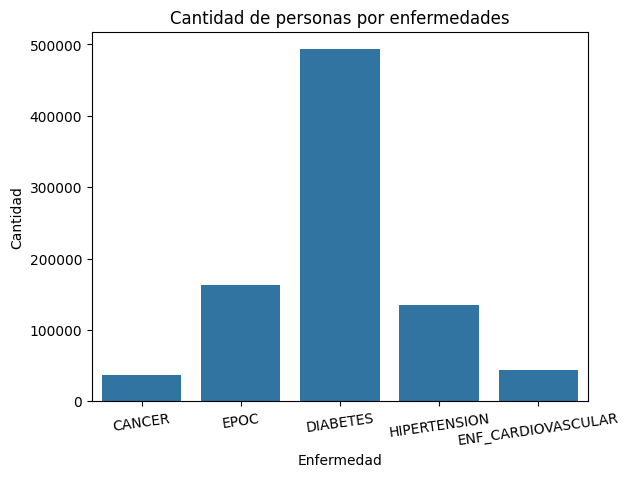

In [11]:
c1 = pd.DataFrame(df[['CANCER','EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR']].sum(), columns = ['Conteo'])
c1 = c1.reset_index()
c1 = c1.rename(columns={'index':'Enfermedad'})
sns.barplot(c1, x='Enfermedad', y ='Conteo')
plt.title('Cantidad de personas por enfermedades')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show()

In [9]:
costos_cancer = df.loc[df['CANCER'] == 1]
costos_cancer = costos_cancer[['CANCER','Valor_Pagado']]
display(costos_cancer)

costos_epoc = df.loc[df['EPOC'] == 1]
costos_epoc = costos_epoc[['EPOC','Valor_Pagado']]
display(costos_epoc)

costos_diabetes = df.loc[df['DIABETES'] == 1]
costos_diabetes = costos_diabetes[['DIABETES','Valor_Pagado']]
display(costos_diabetes)

costos_hipertension = df.loc[df['HIPERTENSION'] == 1]
costos_hipertension = costos_hipertension[['HIPERTENSION','Valor_Pagado']]
display(costos_hipertension)

costos_cardiovascular = df.loc[df['ENF_CARDIOVASCULAR'] == 1]
costos_cardiovascular = costos_cardiovascular[['ENF_CARDIOVASCULAR','Valor_Pagado']]
display(costos_cardiovascular)

costos_totales = {'CANCER':costos_cancer['Valor_Pagado'].sum(),
                 'EPOC': costos_epoc['Valor_Pagado'].sum(), 
                 'DIABETES': costos_diabetes['Valor_Pagado'].sum(), 
                 'HIPERTENSION': costos_hipertension['Valor_Pagado'].sum(), 
                 'ENF_CARDIOVASCULAR': costos_cardiovascular['Valor_Pagado'].sum()}

df_costos = pd.DataFrame(costos_totales, index=['Costos totales'])
df_costos


,CANCER,Valor_Pagado
6021,1,4.642308e+05
6022,1,4.586544e+05
6023,1,4.694169e+05
6024,1,6.443975e+05
6025,1,6.206361e+05
...,...,...
3778921,1,7.115008e+05
3778922,1,5.706494e+05
3778923,1,3.936451e+05
3778924,1,3.930581e+05


,EPOC,Valor_Pagado
167,1,4.385499e+05
168,1,7.226155e+05
169,1,4.717502e+05
170,1,5.232234e+05
171,1,4.002238e+05
...,...,...
3781388,1,7.442682e+05
3781389,1,7.957238e+05
3781390,1,7.957238e+05
3781391,1,1.064883e+06


,DIABETES,Valor_Pagado
40,1,4.512994e+05
41,1,4.894714e+05
42,1,8.718125e+05
43,1,5.458035e+05
44,1,5.212438e+05
...,...,...
3781181,1,3.983234e+05
3781182,1,8.974303e+05
3781183,1,1.006721e+06
3781184,1,7.801584e+06


,HIPERTENSION,Valor_Pagado
40,1,4.512994e+05
41,1,4.894714e+05
42,1,8.718125e+05
43,1,5.458035e+05
44,1,5.212438e+05
...,...,...
3779842,1,4.224881e+06
3779843,1,4.027288e+05
3779844,1,5.342544e+05
3779845,1,2.288266e+06


,ENF_CARDIOVASCULAR,Valor_Pagado
983,1.0,6.666268e+05
984,1.0,4.710179e+05
985,1.0,5.427893e+05
986,1.0,2.348684e+06
987,1.0,4.508894e+06
...,...,...
3778921,1.0,7.115008e+05
3778922,1.0,5.706494e+05
3778923,1.0,3.936451e+05
3778924,1.0,3.930581e+05


,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
Costos totales,4.812181e+10,2.700052e+11,4.578205e+11,1.294142e+11,5.606105e+10


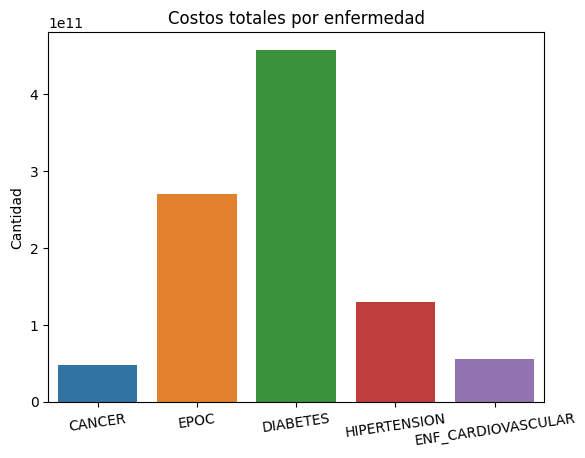

In [10]:
sns.barplot(df_costos)
plt.title('Costos totales por enfermedad')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show()